# Assignment: Preparing Data for Analysis (Modified Titanic)

![](https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/%20files/hw.png)

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

## 1. Load data

In [2]:
df = pd.read_csv('https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/hw/titanic_training_dataset_v2.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.00,NaN,S
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.00,B42,S
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2,W./C. 6607,23.45,NaN,S
889,890,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0,111369,30.00,C148,C
890,891,0.0,3.0,"Dooley, Mr. Patrick",male,32.0,0.0,0,370376,7.75,NaN,Q


In [5]:
df.drop_duplicates(inplace=True)

(891, 12)

## 2. What is the shape of this dataset? (rows & columns)

In [6]:
df.shape

(891, 12)

## 3. Drop unqualified variables

### 3.1. Variables with missing > 50%

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     865 non-null    float64
 2   Pclass       828 non-null    float64
 3   Name         866 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        858 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       852 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     803 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 90.5+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,865.000000,828.000000,714.000000,858.000000,891.000000,891.000000
mean,446.000000,0.383815,2.304348,29.699118,0.524476,0.381594,32.204208
std,257.353842,0.486595,0.836952,14.526497,1.115284,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,866,891,852,204,803
unique,866,2,653,147,3
top,"Sdycoff, Mr. Todor",male,347082,B96 B98,S
freq,1,577,7,4,580


In [10]:
half_count = len(df) / 2
print(half_count)

df = df.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
print(df.shape)
df.columns

445.5
(891, 11)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### 3.2. Dropping Variables with flat values (same categorical value in each column that more than 70%)

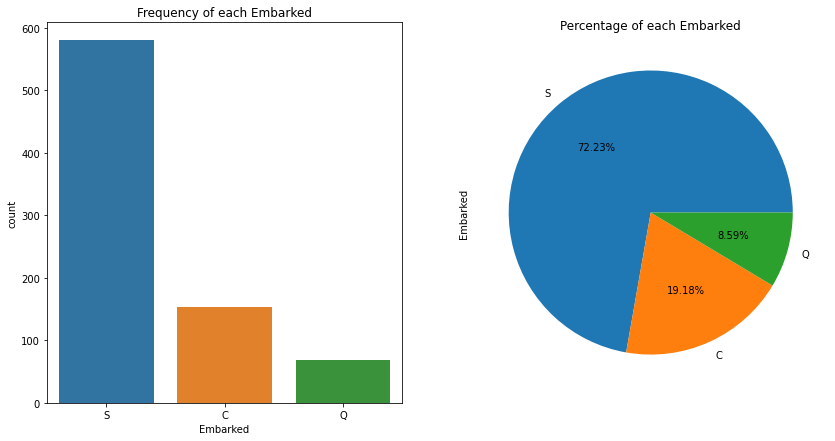

In [11]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='Embarked',data=df,ax=axs[0])
axs[0].set_title("Frequency of each Embarked")
df.Embarked.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Embarked")
plt.show()

In [12]:
df = df.drop(['Embarked'],axis=1) 

### 3.3. How many columns do we have left?

In [13]:
df.shape

(891, 10)

## 4. Assume “Survived” is target, remove all rows with missing “Survived”

In [14]:
df.dropna(subset=['Survived'],inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0000
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0000
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,2,W./C. 6607,23.4500
889,890,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,0,111369,30.0000


## 5. Handle outliers

In [15]:
Q3, Q1 = np.percentile(df.Pclass.dropna(), [75 ,25])
IQR = Q3 - Q1
min = Q1 - (IQR * 1.5)
max = Q3 + (IQR * 1.5)
df.Pclass = np.where(df.Pclass < min, min, df.Pclass)
df.Pclass = np.where(df.Pclass > max, max, df.Pclass)

In [16]:
Q3, Q1 = np.percentile(df.Age.dropna(), [75 ,25])
IQR = Q3 - Q1
min = Q1 - (IQR * 1.5)
max = Q3 + (IQR * 1.5)
df.Age = np.where(df.Age < min, min, df.Age)
df.Age = np.where(df.Age > max, max, df.Age)

In [17]:
Q3, Q1 = np.percentile(df.SibSp.dropna(), [75 ,25])
IQR = Q3 - Q1
min = Q1 - (IQR * 1.5)
max = Q3 + (IQR * 1.5)
df.SibSp = np.where(df.SibSp < min, min, df.SibSp)
df.SibSp = np.where(df.SibSp > max, max, df.SibSp)

In [18]:
Q3, Q1 = np.percentile(df.Parch.dropna(), [75 ,25])
IQR = Q3 - Q1
min = Q1 - (IQR * 1.5)
max = Q3 + (IQR * 1.5)
df.Parch = np.where(df.Parch < min, min, df.Parch)
df.Parch = np.where(df.Parch > max, max, df.Parch)

In [19]:
Q3, Q1 = np.percentile(df.Fare.dropna(), [75 ,25])
IQR = Q3 - Q1
min = Q1 - (IQR * 1.5)
max = Q3 + (IQR * 1.5)
df.Fare = np.where(df.Fare < min, min, df.Fare)
df.Fare = np.where(df.Fare > max, max, df.Fare)

Show mean value of ‘Age’ column

In [20]:
df.Age.mean()

29.828051948051943

## 6. Impute missing values (mean & mode)

In [21]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
PassengerId      0
Survived         0
Pclass          63
Name            25
Sex              0
Age            172
SibSp           33
Parch            0
Ticket          39
Fare             0
dtype: int64


In [22]:
df.fillna(df.mean(), inplace=True)

null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
PassengerId     0
Survived        0
Pclass          0
Name           25
Sex             0
Age             0
SibSp           0
Parch           0
Ticket         39
Fare            0
dtype: int64


In [23]:
df.fillna(df.mode().iloc[0], inplace=True)

null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64


## 7. Convert categorical values with “drop_first”

In [24]:
nominal_columns = ["Sex"]
dummy = pd.get_dummies(df[nominal_columns], drop_first=True) 
df_with_dummy = pd.concat([df, dummy], axis=1)
df_with_dummy = df_with_dummy.drop(nominal_columns, axis=1)
df_with_dummy

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male
0,1,0.0,3.0,"Braund, Mr. Owen Harris",22.000000,1.0,0.0,A/5 21171,7.2500,1
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1.0,0.0,PC 17599,65.6563,0
2,3,1.0,3.0,"Heikkinen, Miss. Laina",26.000000,0.0,0.0,STON/O2. 3101282,7.9250,0
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1.0,0.0,113803,53.1000,0
4,5,0.0,3.0,"Allen, Mr. William Henry",35.000000,0.0,0.0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,"Montvila, Rev. Juozas",27.000000,0.0,0.0,211536,13.0000,1
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",19.000000,0.0,0.0,112053,30.0000,0
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",29.828052,1.0,0.0,W./C. 6607,23.4500,0
889,890,1.0,1.0,"Behr, Mr. Karl Howell",26.000000,0.0,0.0,111369,30.0000,1


How many columns do we have?

In [25]:
df_with_dummy.shape

(865, 10)

## Train/Test split using 70%:30% and random seed with 12345

In [26]:
from sklearn.model_selection import train_test_split
y = df.pop('Survived')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=12345)

In [27]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
807,808,3.0,"Pettersson, Miss. Ellen Natalia",female,18.000000,0.0,0.0,347087,7.7750
324,325,3.0,"Sage, Mr. George John Jr",male,29.828052,2.5,0.0,CA. 2343,65.6563
389,390,2.0,"Lehmann, Miss. Bertha",female,17.000000,0.0,0.0,SC 1748,12.0000
329,330,1.0,"Hippach, Miss. Jean Gertrude",female,16.000000,0.0,0.0,111361,57.9792
779,780,1.0,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.000000,0.0,0.0,24160,65.6563
...,...,...,...,...,...,...,...,...,...
10,11,3.0,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1.0,0.0,PP 9549,16.7000
502,503,3.0,"O'Sullivan, Miss. Bridget Mary",female,29.828052,0.0,0.0,330909,7.6292
0,1,3.0,"Braund, Mr. Owen Harris",male,22.000000,1.0,0.0,A/5 21171,7.2500
223,224,3.0,"Nenkoff, Mr. Christo",male,29.828052,0.0,0.0,349234,7.8958


In [28]:
y_test

807    0.0
324    0.0
389    1.0
329    1.0
779    1.0
      ... 
10     1.0
502    0.0
0      0.0
223    0.0
218    1.0
Name: Survived, Length: 260, dtype: float64

How many rows of training data do we have?


In [29]:
print(X_train.shape)
print(y_train.shape)

(605, 9)
(605,)


In [30]:
y_train.value_counts() / y_train.shape[0]

0.0    0.616529
1.0    0.383471
Name: Survived, dtype: float64


How many rows of testing data do we have?

In [31]:
print(X_test.shape)
print(y_test.shape)

(260, 9)
(260,)


In [32]:
y_test.value_counts() / y_test.shape[0]

0.0    0.615385
1.0    0.384615
Name: Survived, dtype: float64